**LOAD THE DATASETS**

In [ ]:
# Import necessary library
import pandas as pd

# Load the uploaded datasets
country_wise_latest_path = "/content/country_wise_latest.csv"
covid_19_clean_complete_path = "/content/covid_19_clean_complete.csv"
day_wise_path = "/content/day_wise.csv"
full_grouped_path = "/content/full_grouped.csv"
usa_county_wise_path = "/content/usa_county_wise.csv"
worldometer_data_path = "/content/worldometer_data.csv"

# Load each dataset into a DataFrame
country_wise_latest = pd.read_csv("/content/country_wise_latest.csv")
covid_19_clean_complete = pd.read_csv("/content/covid_19_clean_complete.csv")
day_wise = pd.read_csv("/content/day_wise.csv")
full_grouped = pd.read_csv("/content/full_grouped.csv")
usa_county_wise = pd.read_csv("/content/usa_county_wise.csv")
worldometer_data = pd.read_csv("/content/worldometer_data.csv")

# Inspect the first few rows and summarize each dataset
country_wise_latest_head = country_wise_latest.head()
country_wise_latest_info = country_wise_latest.info()
country_wise_latest_missing = country_wise_latest.isnull().sum()

covid_19_clean_complete_head = covid_19_clean_complete.head()
covid_19_clean_complete_info = covid_19_clean_complete.info()
covid_19_clean_complete_missing = covid_19_clean_complete.isnull().sum()

day_wise_head = day_wise.head()
day_wise_info = day_wise.info()
day_wise_missing = day_wise.isnull().sum()

full_grouped_head = full_grouped.head()
full_grouped_info = full_grouped.info()
full_grouped_missing = full_grouped.isnull().sum()

usa_county_wise_head = usa_county_wise.head()
usa_county_wise_info = usa_county_wise.info()
usa_county_wise_missing = usa_county_wise.isnull().sum()

worldometer_data_head = worldometer_data.head()
worldometer_data_info = worldometer_data.info()
worldometer_data_missing = worldometer_data.isnull().sum()

(country_wise_latest_head, country_wise_latest_missing, covid_19_clean_complete_head, covid_19_clean_complete_missing, day_wise_head, day_wise_missing, full_grouped_head, full_grouped_missing, usa_county_wise_head, usa_county_wise_missing, worldometer_data_head, worldometer_data_missing)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

(  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
 0    Afghanistan      36263    1269      25198    9796        106          10   
 1        Albania       4880     144       2745    1991        117           6   
 2        Algeria      27973    1163      18837    7973        616           8   
 3        Andorra        907      52        803      52         10           0   
 4         Angola        950      41        242     667         18           1   
 
    New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
 0             18                3.50                  69.49   
 1             63                2.95                  56.25   
 2            749                4.16                  67.34   
 3              0                5.73                  88.53   
 4              0                4.32                  25.47   
 
    Deaths / 100 Recovered  Confirmed last week  1 week change  \
 0                    5.04                35526       

**STANDARDIZING THE DATASETS**

In [ ]:
# Import library
import pandas as pd

# covid19 clean complete Data: Date column
covid_19_clean_complete['Date'] = pd.to_datetime(covid_19_clean_complete['Date'], errors='coerce')

# day wise Data: Date column
day_wise['Date'] = pd.to_datetime(day_wise['Date'], errors='coerce')

# Full Grouped: Date column
full_grouped['Date'] = pd.to_datetime(full_grouped['Date'], errors='coerce')

# USA County Wise: Date column
usa_county_wise['Date'] = pd.to_datetime(usa_county_wise['Date'], errors='coerce')

# Check if any dates failed to convert in 'covid_19_clean_complete' DataFrame
missing_dates_covid_19_clean_complete = covid_19_clean_complete['Date'].isnull().sum()
print(f"Number of missing dates in covid_19_clean_complete after standardization: {missing_dates_covid_19_clean_complete}")

# Check if any dates failed to convert in 'day_wise' DataFrame
missing_dates_day_wise = day_wise['Date'].isnull().sum()
print(f"Number of missing dates in day_wise after standardization: {missing_dates_day_wise}")

# Check if any dates failed to convert in 'full_grouped' DataFrame
missing_dates_full_grouped = full_grouped['Date'].isnull().sum

Number of missing dates in covid_19_clean_complete after standardization: 0
Number of missing dates in day_wise after standardization: 0


**HANDLING MISSING VALUES**

In [ ]:
# Check for missing values in the dataset
missing_summary = worldometer_data.isnull().sum()
print("Missing values summary:")
print(missing_summary)

Missing values summary:
Country/Region        0
Continent             1
Population            1
TotalCases            0
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
WHO Region           25
dtype: int64
Index(['Country/Region', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'WHO Region'],
      dtype='object')


In [ ]:
# Drop the 'Province/State' column, handling potential KeyError
try:
    covid_19_clean_complete.drop(columns=['Province/State'], inplace=True)
except KeyError:
    print("Column 'Province/State' not found in the DataFrame. It might have already been removed or the name is incorrect.")
    # Check if the column name is slightly different (e.g., case sensitivity, spaces):
    print("Existing columns:", covid_19_clean_complete.columns)

# Verify the column has been dropped (if successful)
if 'Province/State' not in covid_19_clean_complete.columns:
    print(covid_19_clean_complete.columns)

Column 'Province/State' not found in the DataFrame. It might have already been removed or the name is incorrect.
Existing columns: Index(['Country/Region', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'WHO Region'],
      dtype='object')
Index(['Country/Region', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'WHO Region'],
      dtype='object')


In [ ]:
# Drop the 'FIPS' column
usa_county_wise.drop(columns=['FIPS'], inplace=True)

# Verify the column has been dropped
print(usa_county_wise.columns)


Index(['UID', 'iso2', 'iso3', 'code3', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Date', 'Confirmed',
       'Deaths'],
      dtype='object')


In [ ]:
# Drop the 'Admin2' column
usa_county_wise.drop(columns=['Admin2'], inplace=True)

# Verify the column has been dropped
print(usa_county_wise.columns)


Index(['UID', 'iso2', 'iso3', 'code3', 'Province_State', 'Country_Region',
       'Lat', 'Long_', 'Combined_Key', 'Date', 'Confirmed', 'Deaths'],
      dtype='object')


In [ ]:
# Handling missing values in the worldometer_data.csv dataset

# Check initial missing values
print("Initial missing values summary:")
print(worldometer_data.isnull().sum())

# 1. Fill missing categorical values
# Continent: Replace missing with "Unknown"
worldometer_data['Continent'].fillna('Unknown', inplace=True)

# WHO Region: Replace missing with "Not Specified"
worldometer_data['WHO Region'].fillna('Not Specified', inplace=True)

# 2. Fill missing numeric values
# Population: Replace missing with the median value
worldometer_data['Population'].fillna(worldometer_data['Population'].median(), inplace=True)

# NewCases, NewDeaths, NewRecovered: Replace missing with 0 (assuming no new cases/deaths/recoveries reported)
worldometer_data['NewCases'].fillna(0, inplace=True)
worldometer_data['NewDeaths'].fillna(0, inplace=True)
worldometer_data['NewRecovered'].fillna(0, inplace=True)

# TotalDeaths, TotalRecovered, ActiveCases: Replace missing with 0 (assume unreported = 0)
worldometer_data['TotalDeaths'].fillna(0, inplace=True)
worldometer_data['TotalRecovered'].fillna(0, inplace=True)
worldometer_data['ActiveCases'].fillna(0, inplace=True)

# Serious,Critical: Replace missing with the median value (assumes most regions report consistent serious cases)
worldometer_data['Serious,Critical'].fillna(worldometer_data['Serious,Critical'].median(), inplace=True)

# Tot Cases/1M pop, Deaths/1M pop: Replace missing with the median value
worldometer_data['Tot Cases/1M pop'].fillna(worldometer_data['Tot Cases/1M pop'].median(), inplace=True)
worldometer_data['Deaths/1M pop'].fillna(worldometer_data['Deaths/1M pop'].median(), inplace=True)

# TotalTests, Tests/1M pop: Replace missing with the median value
worldometer_data['TotalTests'].fillna(worldometer_data['TotalTests'].median(), inplace=True)
worldometer_data['Tests/1M pop'].fillna(worldometer_data['Tests/1M pop'].median(), inplace=True)

# Verify missing values are handled
print("Missing values summary after handling:")
print(worldometer_data.isnull().sum())


Initial missing values summary:
Country/Region        0
Continent             1
Population            1
TotalCases            0
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
WHO Region           25
dtype: int64
Missing values summary after handling:
Country/Region      0
Continent           0
Population          0
TotalCases          0
NewCases            0
TotalDeaths         0
NewDeaths           0
TotalRecovered      0
NewRecovered        0
ActiveCases         0
Serious,Critical    0
Tot Cases/1M pop    0
Deaths/1M pop       0
TotalTests          0
Tests/1M pop        0
WHO Region          0
dtype: int64


<ipython-input-26-62f025240759>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  worldometer_data['Continent'].fillna('Unknown', inplace=True)
<ipython-input-26-62f025240759>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

**REMOVING DUPLICATES**


In [ ]:
# Check for duplicate rows
duplicates_count = country_wise_latest.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

# Remove duplicate rows
country_wise_latest.drop_duplicates(inplace=True)

# Verify if duplicates have been removed
remaining_duplicates = country_wise_latest.duplicated().sum()
print(f"Number of duplicate rows after removal: {remaining_duplicates}")


Number of duplicate rows: 0
Number of duplicate rows after removal: 0


In [ ]:
# Check for duplicate rows
duplicates_count = covid_19_clean_complete.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

# Remove duplicate rows
covid_19_clean_complete.drop_duplicates(inplace=True)

# Verify if duplicates have been removed
remaining_duplicates = covid_19_clean_complete.duplicated().sum()
print(f"Number of duplicate rows after removal: {remaining_duplicates}")


Number of duplicate rows: 0
Number of duplicate rows after removal: 0


In [ ]:
# Check for duplicate rows
duplicates_count = day_wise.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

# Remove duplicate rows
day_wise.drop_duplicates(inplace=True)

# Verify if duplicates have been removed
remaining_duplicates = day_wise.duplicated().sum()
print(f"Number of duplicate rows after removal: {remaining_duplicates}")


Number of duplicate rows: 0
Number of duplicate rows after removal: 0


In [ ]:
# Check for duplicate rows
duplicates_count = full_grouped.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

# Remove duplicate rows
full_grouped.drop_duplicates(inplace=True)

# Verify if duplicates have been removed
remaining_duplicates = full_grouped.duplicated().sum()
print(f"Number of duplicate rows after removal: {remaining_duplicates}")


Number of duplicate rows: 0
Number of duplicate rows after removal: 0


In [ ]:
# Check for duplicate rows
duplicates_count = usa_county_wise.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

# Remove duplicate rows
usa_county_wise.drop_duplicates(inplace=True)

# Verify if duplicates have been removed
remaining_duplicates = usa_county_wise.duplicated().sum()
print(f"Number of duplicate rows after removal: {remaining_duplicates}")


Number of duplicate rows: 0
Number of duplicate rows after removal: 0


In [ ]:
# Check for duplicate rows
duplicates_count = worldometer_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

# Remove duplicate rows
worldometer_data.drop_duplicates(inplace=True)

# Verify if duplicates have been removed
remaining_duplicates = worldometer_data.duplicated().sum()
print(f"Number of duplicate rows after removal: {remaining_duplicates}")


Number of duplicate rows: 0
Number of duplicate rows after removal: 0


**FEATURE ENGINEERING**


In [ ]:
print(country_wise_latest.columns)


Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')


In [ ]:
# Check for missing values in key columns
print(country_wise_latest[['Confirmed', 'Deaths', 'Recovered', 'Active']].isnull().sum())

# Fill missing values with 0 for critical numeric columns
country_wise_latest[['Confirmed', 'Deaths', 'Recovered', 'Active']] = \
    country_wise_latest[['Confirmed', 'Deaths', 'Recovered', 'Active']].fillna(0)

# 1. Calculate Daily Growth Rates (Confirmed, Deaths, Recovered)
# Since there is no time-series data in this dataset, we'll approximate "growth" as differences between columns (e.g., New cases).
country_wise_latest['DailyGrowth_Confirmed'] = country_wise_latest['New cases']
country_wise_latest['DailyGrowth_Deaths'] = country_wise_latest['New deaths']
country_wise_latest['DailyGrowth_Recovered'] = country_wise_latest['New recovered']

# Replace missing or NaN values in growth columns with 0
country_wise_latest[['DailyGrowth_Confirmed', 'DailyGrowth_Deaths', 'DailyGrowth_Recovered']] = \
    country_wise_latest[['DailyGrowth_Confirmed', 'DailyGrowth_Deaths', 'DailyGrowth_Recovered']].fillna(0)

# 2. Calculate Mortality Ratio (Deaths / Confirmed)
country_wise_latest['MortalityRatio'] = country_wise_latest['Deaths'] / country_wise_latest['Confirmed']

# Replace any infinite or NaN values in MortalityRatio with 0
country_wise_latest['MortalityRatio'].replace([float('inf'), float('nan')], 0, inplace=True)

# 3. Calculate Recovered Ratio (Recovered / Confirmed)
country_wise_latest['RecoveredRatio'] = country_wise_latest['Recovered'] / country_wise_latest['Confirmed']

# Replace any infinite or NaN values in RecoveredRatio with 0
country_wise_latest['RecoveredRatio'].replace([float('inf'), float('nan')], 0, inplace=True)

# 4. Add a custom feature: Active cases as a percentage of Confirmed cases
country_wise_latest['ActiveRatio'] = country_wise_latest['Active'] / country_wise_latest['Confirmed']

# Replace any infinite or NaN values in ActiveRatio with 0
country_wise_latest['ActiveRatio'].replace([float('inf'), float('nan')], 0, inplace=True)

# 5. Preview the new dataset with added features
print(country_wise_latest[['Confirmed', 'Deaths', 'DailyGrowth_Confirmed', 'MortalityRatio', 'RecoveredRatio', 'ActiveRatio']].head())


Confirmed    0
Deaths       0
Recovered    0
Active       0
dtype: int64
   Confirmed  Deaths  DailyGrowth_Confirmed  MortalityRatio  RecoveredRatio  \
0      36263    1269                    106        0.034994        0.694868   
1       4880     144                    117        0.029508        0.562500   
2      27973    1163                    616        0.041576        0.673399   
3        907      52                     10        0.057332        0.885336   
4        950      41                     18        0.043158        0.254737   

   ActiveRatio  
0     0.270138  
1     0.407992  
2     0.285025  
3     0.057332  
4     0.702105  


<ipython-input-39-174b38b1331c>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  country_wise_latest['MortalityRatio'].replace([float('inf'), float('nan')], 0, inplace=True)
<ipython-input-39-174b38b1331c>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

In [ ]:
print(covid_19_clean_complete.columns)


Index(['Country/Region', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'WHO Region'],
      dtype='object')


In [ ]:
# Check for missing values in key columns
print(covid_19_clean_complete[['Confirmed', 'Deaths', 'Recovered', 'Active']].isnull().sum())

# Fill missing values with 0 for critical numeric columns
covid_19_clean_complete[['Confirmed', 'Deaths', 'Recovered', 'Active']] = \
    covid_19_clean_complete[['Confirmed', 'Deaths', 'Recovered', 'Active']].fillna(0)

# 1. Calculate Daily Growth Rates (Confirmed, Deaths, Recovered)
# Use the `.groupby()` function by 'Country/Region' and calculate the difference
covid_19_clean_complete['DailyGrowth_Confirmed'] = covid_19_clean_complete.groupby('Country/Region')['Confirmed'].diff().fillna(0)
covid_19_clean_complete['DailyGrowth_Deaths'] = covid_19_clean_complete.groupby('Country/Region')['Deaths'].diff().fillna(0)
covid_19_clean_complete['DailyGrowth_Recovered'] = covid_19_clean_complete.groupby('Country/Region')['Recovered'].diff().fillna(0)

# 2. Calculate Mortality Ratio (Deaths / Confirmed)
covid_19_clean_complete['MortalityRatio'] = covid_19_clean_complete['Deaths'] / covid_19_clean_complete['Confirmed']

# Replace any infinite or NaN values in MortalityRatio with 0
covid_19_clean_complete['MortalityRatio'].replace([float('inf'), float('nan')], 0, inplace=True)

# 3. Calculate Recovery Ratio (Recovered / Confirmed)
covid_19_clean_complete['RecoveryRatio'] = covid_19_clean_complete['Recovered'] / covid_19_clean_complete['Confirmed']

# Replace any infinite or NaN values in RecoveryRatio with 0
covid_19_clean_complete['RecoveryRatio'].replace([float('inf'), float('nan')], 0, inplace=True)

# 4. Preview the new dataset with added features
print(covid_19_clean_complete[['Date', 'Country/Region', 'Confirmed', 'DailyGrowth_Confirmed', 'MortalityRatio', 'RecoveryRatio']].head())


Confirmed    0
Deaths       0
Recovered    0
Active       0
dtype: int64
        Date Country/Region  Confirmed  DailyGrowth_Confirmed  MortalityRatio  \
0 2020-01-22    Afghanistan          0                    0.0             0.0   
1 2020-01-22        Albania          0                    0.0             0.0   
2 2020-01-22        Algeria          0                    0.0             0.0   
3 2020-01-22        Andorra          0                    0.0             0.0   
4 2020-01-22         Angola          0                    0.0             0.0   

   RecoveryRatio  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  


<ipython-input-42-3d5de542b6f7>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  covid_19_clean_complete['MortalityRatio'].replace([float('inf'), float('nan')], 0, inplace=True)
<ipython-input-42-3d5de542b6f7>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doi

In [ ]:
# Check the column names and inspect for any missing values
print(day_wise.columns)
print(day_wise.isnull().sum())

# Fill missing values for key columns with 0
day_wise[['Confirmed', 'Deaths', 'Recovered', 'Active']] = day_wise[['Confirmed', 'Deaths', 'Recovered', 'Active']].fillna(0)

# 1. Calculate Daily Growth Rates (Confirmed, Deaths, Recovered)
# Using the columns `New cases`, `New deaths`, `New recovered` to track daily changes
day_wise['DailyGrowth_Confirmed'] = day_wise['New cases']
day_wise['DailyGrowth_Deaths'] = day_wise['New deaths']
day_wise['DailyGrowth_Recovered'] = day_wise['New recovered']

# Fill any NaN values with 0
day_wise[['DailyGrowth_Confirmed', 'DailyGrowth_Deaths', 'DailyGrowth_Recovered']] = \
    day_wise[['DailyGrowth_Confirmed', 'DailyGrowth_Deaths', 'DailyGrowth_Recovered']].fillna(0)

# 2. Calculate Mortality Ratio (Deaths / Confirmed)
day_wise['MortalityRatio'] = day_wise['Deaths'] / day_wise['Confirmed']

# Replace any infinite or NaN values in MortalityRatio with 0
day_wise['MortalityRatio'].replace([float('inf'), float('nan')], 0, inplace=True)

# 3. Calculate Recovery Ratio (Recovered / Confirmed)
day_wise['RecoveryRatio'] = day_wise['Recovered'] / day_wise['Confirmed']

# Replace any infinite or NaN values in RecoveryRatio with 0
day_wise['RecoveryRatio'].replace([float('inf'), float('nan')], 0, inplace=True)

# 4. Calculate Active Ratio (Active / Confirmed)
day_wise['ActiveRatio'] = day_wise['Active'] / day_wise['Confirmed']

# Replace any infinite or NaN values in ActiveRatio with 0
day_wise['ActiveRatio'].replace([float('inf'), float('nan')], 0, inplace=True)

# 5. Preview the new dataset with added features
print(day_wise[['Date', 'Confirmed', 'DailyGrowth_Confirmed', 'MortalityRatio', 'RecoveryRatio', 'ActiveRatio']].head())


Index(['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries'],
      dtype='object')
Date                      0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
No. of countries          0
dtype: int64
        Date  Confirmed  DailyGrowth_Confirmed  MortalityRatio  RecoveryRatio  \
0 2020-01-22        555                      0        0.030631       0.050450   
1 2020-01-23        654                     99        0.027523       0.045872   
2 2020-01-24        941                    287        0.027630       0.038257   
3 2020-01-25       1434                    493        0.029289       0.027197   
4 2020-01-2

<ipython-input-44-73d58dfab32d>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_wise['MortalityRatio'].replace([float('inf'), float('nan')], 0, inplace=True)
<ipython-input-44-73d58dfab32d>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].met

In [ ]:
# Check the column names and inspect for any missing values
print(full_grouped.columns)
print(full_grouped.isnull().sum())

# Fill missing values for key columns with 0
full_grouped[['Confirmed', 'Deaths', 'Recovered', 'Active']] = \
    full_grouped[['Confirmed', 'Deaths', 'Recovered', 'Active']].fillna(0)

# 1. Calculate Daily Growth Rates (Confirmed, Deaths, Recovered)
# Use `New cases`, `New deaths`, `New recovered` columns for daily growth
full_grouped['DailyGrowth_Confirmed'] = full_grouped['New cases']
full_grouped['DailyGrowth_Deaths'] = full_grouped['New deaths']
full_grouped['DailyGrowth_Recovered'] = full_grouped['New recovered']

# Fill NaN values with 0
full_grouped[['DailyGrowth_Confirmed', 'DailyGrowth_Deaths', 'DailyGrowth_Recovered']] = \
    full_grouped[['DailyGrowth_Confirmed', 'DailyGrowth_Deaths', 'DailyGrowth_Recovered']].fillna(0)

# 2. Calculate Mortality Ratio (Deaths / Confirmed)
full_grouped['MortalityRatio'] = full_grouped['Deaths'] / full_grouped['Confirmed']

# Replace any infinite or NaN values in MortalityRatio with 0
full_grouped['MortalityRatio'].replace([float('inf'), float('nan')], 0, inplace=True)

# 3. Calculate Recovery Ratio (Recovered / Confirmed)
full_grouped['RecoveryRatio'] = full_grouped['Recovered'] / full_grouped['Confirmed']

# Replace any infinite or NaN values in RecoveryRatio with 0
full_grouped['RecoveryRatio'].replace([float('inf'), float('nan')], 0, inplace=True)

# 4. Calculate Active Ratio (Active / Confirmed)
full_grouped['ActiveRatio'] = full_grouped['Active'] / full_grouped['Confirmed']

# Replace any infinite or NaN values in ActiveRatio with 0
full_grouped['ActiveRatio'].replace([float('inf'), float('nan')], 0, inplace=True)

# 5. Preview the new dataset with added features
print(full_grouped[['Date', 'Country/Region', 'Confirmed', 'DailyGrowth_Confirmed', 'MortalityRatio', 'RecoveryRatio', 'ActiveRatio']].head())


Index(['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'WHO Region'],
      dtype='object')
Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Region        0
dtype: int64
        Date Country/Region  Confirmed  DailyGrowth_Confirmed  MortalityRatio  \
0 2020-01-22    Afghanistan          0                      0             0.0   
1 2020-01-22        Albania          0                      0             0.0   
2 2020-01-22        Algeria          0                      0             0.0   
3 2020-01-22        Andorra          0                      0             0.0   
4 2020-01-22         Angola          0                      0             0.0   

   RecoveryRatio  ActiveRatio  
0            0.0          0.0  
1            0.0          0.0  
2            0.0          0.0  
3    

<ipython-input-46-f5362b5c4be8>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  full_grouped['MortalityRatio'].replace([float('inf'), float('nan')], 0, inplace=True)
<ipython-input-46-f5362b5c4be8>:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col]

In [ ]:
# Check the column names and inspect for any missing values
print(usa_county_wise.columns)
print(usa_county_wise.isnull().sum())

# Fill missing values for key columns with 0
usa_county_wise[['Confirmed', 'Deaths']] = usa_county_wise[['Confirmed', 'Deaths']].fillna(0)

# 1. Calculate Daily Growth Rates (Confirmed, Deaths)
# Using the columns 'Confirmed' and 'Deaths', we can track daily growth
usa_county_wise['DailyGrowth_Confirmed'] = usa_county_wise['Confirmed'].diff()
usa_county_wise['DailyGrowth_Deaths'] = usa_county_wise['Deaths'].diff()

# Fill NaN values with 0 for the first row
usa_county_wise[['DailyGrowth_Confirmed', 'DailyGrowth_Deaths']] = \
    usa_county_wise[['DailyGrowth_Confirmed', 'DailyGrowth_Deaths']].fillna(0)

# 2. Calculate Mortality Ratio (Deaths / Confirmed)
usa_county_wise['MortalityRatio'] = usa_county_wise['Deaths'] / usa_county_wise['Confirmed']

# Replace any infinite or NaN values in MortalityRatio with 0
usa_county_wise['MortalityRatio'].replace([float('inf'), float('nan')], 0, inplace=True)

# 3. Preview the new dataset with added features (for selected columns)
print(usa_county_wise[['Date', 'Country_Region', 'Province_State', 'Confirmed', 'Deaths', 'DailyGrowth_Confirmed', 'MortalityRatio']].head())


Index(['UID', 'iso2', 'iso3', 'code3', 'Province_State', 'Country_Region',
       'Lat', 'Long_', 'Combined_Key', 'Date', 'Confirmed', 'Deaths'],
      dtype='object')
UID               0
iso2              0
iso3              0
code3             0
Province_State    0
Country_Region    0
Lat               0
Long_             0
Combined_Key      0
Date              0
Confirmed         0
Deaths            0
dtype: int64
        Date Country_Region            Province_State  Confirmed  Deaths  \
0 2020-01-22             US            American Samoa          0       0   
1 2020-01-22             US                      Guam          0       0   
2 2020-01-22             US  Northern Mariana Islands          0       0   
3 2020-01-22             US               Puerto Rico          0       0   
4 2020-01-22             US               Puerto Rico          0       0   

   DailyGrowth_Confirmed  MortalityRatio  
0                    0.0             0.0  
1                    0.0            

<ipython-input-48-f9cd1a318d5e>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  usa_county_wise['MortalityRatio'].replace([float('inf'), float('nan')], 0, inplace=True)


In [ ]:
print(worldometer_data.columns)

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region', 'DailyGrowth_Confirmed',
       'DailyGrowth_Deaths', 'DailyGrowth_Recovered', 'MortalityRatio',
       'CasesPerMillion'],
      dtype='object')


In [ ]:
# 1. Calculate Daily Growth Rates (Confirmed, Deaths, Recovered)
worldometer_data['DailyGrowth_Confirmed'] = worldometer_data['TotalCases'].diff()
worldometer_data['DailyGrowth_Deaths'] = worldometer_data['TotalDeaths'].diff()
worldometer_data['DailyGrowth_Recovered'] = worldometer_data['TotalRecovered'].diff()

# Fill NaN values in the new columns with 0 (for the first row or missing data)
worldometer_data[['DailyGrowth_Confirmed', 'DailyGrowth_Deaths', 'DailyGrowth_Recovered']] = \
    worldometer_data[['DailyGrowth_Confirmed', 'DailyGrowth_Deaths', 'DailyGrowth_Recovered']].fillna(0)

# 2. Calculate Mortality Ratio (TotalDeaths / TotalCases)
worldometer_data['MortalityRatio'] = worldometer_data['TotalDeaths'] / worldometer_data['TotalCases']

# Replace any infinite or NaN values in MortalityRatio with 0 (to handle cases where TotalCases is 0)
worldometer_data['MortalityRatio'].replace([float('inf'), float('nan')], 0, inplace=True)

# 3. Calculate Cases Per Population (TotalCases / Population)
worldometer_data['CasesPerMillion'] = (worldometer_data['TotalCases'] / worldometer_data['Population']) * 1e6

# Replace any NaN or infinite values in CasesPerMillion with 0
worldometer_data['CasesPerMillion'].replace([float('inf'), float('nan')], 0, inplace=True)

# 4. Preview the new dataset with added features
print(worldometer_data[['TotalCases', 'TotalDeaths', 'DailyGrowth_Confirmed', 'MortalityRatio', 'CasesPerMillion']].head())


   TotalCases  TotalDeaths  DailyGrowth_Confirmed  MortalityRatio  \
0     5032179     162804.0                    0.0        0.032353   
1     2917562      98644.0             -2114617.0        0.033810   
2     2025409      41638.0              -892153.0        0.020558   
3      871894      14606.0             -1153515.0        0.016752   
4      538184       9604.0              -333710.0        0.017845   

   CasesPerMillion  
0     15193.862961  
1     13716.104125  
2      1466.258613  
3      5974.294092  
4      9063.149328  


<ipython-input-36-e3fa74744e51>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  worldometer_data['MortalityRatio'].replace([float('inf'), float('nan')], 0, inplace=True)
<ipython-input-36-e3fa74744e51>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[

**DATA NORMALIZATION**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select the columns to be scaled (columns from the previous feature engineering steps)
columns_to_scale = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'DailyGrowth_Confirmed',
                    'DailyGrowth_Deaths', 'DailyGrowth_Recovered', 'MortalityRatio',  'ActiveRatio'] # Removed 'RecoveryRatio' from the list as it is causing KeyError

# Check if all columns in columns_to_scale are present in country_wise_latest
missing_cols = [col for col in columns_to_scale if col not in country_wise_latest.columns]

if missing_cols:
    print(f"Error: The following columns are missing in the DataFrame: {missing_cols}")
else:
    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()

    # Apply the scaler to the selected columns
    df_scaled = country_wise_latest[columns_to_scale]
    df_scaled = scaler.fit_transform(df_scaled)

    # Convert the result back to DataFrame
    df_scaled = pd.DataFrame(df_scaled, columns=columns_to_scale)

    # Preview the scaled data
    print(df_scaled.head())

   Confirmed    Deaths  Recovered    Active  DailyGrowth_Confirmed  \
0   0.008450  0.008574   0.013645  0.003478               0.001882   
1   0.001135  0.000973   0.001486  0.000707               0.002077   
2   0.006518  0.007858   0.010201  0.002831               0.010934   
3   0.000209  0.000351   0.000435  0.000018               0.000178   
4   0.000219  0.000277   0.000131  0.000237               0.000320   

   DailyGrowth_Deaths  DailyGrowth_Recovered  MortalityRatio  ActiveRatio  
0            0.009294               0.000534        0.122516     0.270138  
1            0.005576               0.001868        0.103309     0.407992  
2            0.007435               0.022207        0.145558     0.285025  
3            0.000000               0.000000        0.200721     0.057332  
4            0.000929               0.000000        0.151097     0.702105  


In [ ]:
print(covid_19_clean_complete.columns)

Index(['Country/Region', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'WHO Region', 'DailyGrowth_Confirmed',
       'DailyGrowth_Deaths', 'DailyGrowth_Recovered', 'MortalityRatio',
       'RecoveryRatio'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select the columns to be scaled (columns from the previous feature engineering steps)
# Exclude 'Country/Region', 'Date', and 'WHO Region' as they are non-numerical
columns_to_scale = ['Lat', 'Long', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'DailyGrowth_Confirmed',
       'DailyGrowth_Deaths', 'DailyGrowth_Recovered', 'MortalityRatio',
       'RecoveryRatio']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler to the selected columns
df_scaled = covid_19_clean_complete[columns_to_scale]
df_scaled = scaler.fit_transform(df_scaled)

# Convert the result back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=columns_to_scale)

# Concatenate the scaled data with the original non-numerical columns
df_final = pd.concat([covid_19_clean_complete[['Country/Region', 'Date', 'WHO Region']], df_scaled], axis=1)

# Preview the scaled data
print(df_final.head())

  Country/Region       Date             WHO Region       Lat      Long  \
0    Afghanistan 2020-01-22  Eastern Mediterranean  0.694196  0.647501   
1        Albania 2020-01-22                 Europe  0.752609  0.495642   
2        Algeria 2020-01-22                 Africa  0.646382  0.436521   
3        Andorra 2020-01-22                 Europe  0.763564  0.436081   
4         Angola 2020-01-22                 Africa  0.328685  0.488314   

   Confirmed  Deaths  Recovered    Active  DailyGrowth_Confirmed  \
0        0.0     0.0        0.0  0.000005               0.500007   
1        0.0     0.0        0.0  0.000005               0.500007   
2        0.0     0.0        0.0  0.000005               0.500007   
3        0.0     0.0        0.0  0.000005               0.500007   
4        0.0     0.0        0.0  0.000005               0.500007   

   DailyGrowth_Deaths  DailyGrowth_Recovered  MortalityRatio  RecoveryRatio  
0            0.500005               0.340808             0.0        

In [ ]:
print(day_wise.columns)

Index(['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries',
       'DailyGrowth_Confirmed', 'DailyGrowth_Deaths', 'DailyGrowth_Recovered',
       'MortalityRatio', 'RecoveryRatio', 'ActiveRatio'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Columns to scale
columns_to_scale_day_wise = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
                             'New deaths', 'New recovered', 'Deaths / 100 Cases',
                             'Recovered / 100 Cases', 'Deaths / 100 Recovered',
                             'No. of countries', 'DailyGrowth_Confirmed',
                             'DailyGrowth_Deaths', 'DailyGrowth_Recovered',
                             'MortalityRatio', 'RecoveryRatio', 'ActiveRatio']

# Verify that all columns to scale are present in the dataset
missing_columns_day_wise = [col for col in columns_to_scale_day_wise if col not in day_wise.columns]
if missing_columns_day_wise:
    print(f"Missing columns in day_wise.csv: {missing_columns_day_wise}")
else:
    print("All columns are present in day_wise.csv.")

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler to the selected columns
df_scaled_day_wise = day_wise[columns_to_scale_day_wise].copy()

# Apply MinMaxScaler
df_scaled_day_wise = scaler.fit_transform(df_scaled_day_wise)

# Convert the result back to DataFrame
df_scaled_day_wise = pd.DataFrame(df_scaled_day_wise, columns=columns_to_scale_day_wise)

# Optional: Add the scaled data back to the original dataset (day_wise)
day_wise[columns_to_scale_day_wise] = df_scaled_day_wise

# Preview the scaled data
print(day_wise[columns_to_scale_day_wise].head())


All columns are present in day_wise.csv.
   Confirmed    Deaths     Recovered    Active  New cases  New deaths  \
0   0.000000  0.000000  0.000000e+00  0.000000   0.000000    0.000000   
1   0.000006  0.000002  2.112365e-07  0.000015   0.000350    0.000100   
2   0.000023  0.000014  8.449461e-07  0.000058   0.001015    0.000803   
3   0.000053  0.000038  1.161801e-06  0.000133   0.001744    0.001605   
4   0.000095  0.000060  2.534838e-06  0.000236   0.002419    0.001405   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0       0.000000            0.198444               0.059921   
1       0.000007            0.138132               0.051668   
2       0.000021            0.140078               0.038034   
3       0.000011            0.173152               0.018120   
4       0.000046            0.116732               0.013455   

   Deaths / 100 Recovered  No. of countries  DailyGrowth_Confirmed  \
0                0.424826          0.000000               0.000000   
1

In [ ]:
print(full_grouped.columns)

Index(['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'WHO Region',
       'DailyGrowth_Confirmed', 'DailyGrowth_Deaths', 'DailyGrowth_Recovered',
       'MortalityRatio', 'RecoveryRatio', 'ActiveRatio'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Columns to scale (excluding 'Date' and 'Country/Region')
columns_to_scale_full_grouped = ['Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered',
       'DailyGrowth_Confirmed', 'DailyGrowth_Deaths', 'DailyGrowth_Recovered',
       'MortalityRatio', 'RecoveryRatio', 'ActiveRatio']

# Verify that all columns to scale are present in the dataset
missing_columns_full_grouped = [col for col in columns_to_scale_full_grouped if col not in full_grouped.columns]
if missing_columns_full_grouped:
    print(f"Missing columns in full_grouped.csv: {missing_columns_full_grouped}")
else:
    print("All columns are present in full_grouped.csv.")

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler to the selected columns
df_scaled_full_grouped = full_grouped[columns_to_scale_full_grouped].copy()

# Apply MinMaxScaler
df_scaled_full_grouped = scaler.fit_transform(df_scaled_full_grouped)

# Convert the result back to DataFrame
df_scaled_full_grouped = pd.DataFrame(df_scaled_full_grouped, columns=columns_to_scale_full_grouped)

# Optional: Add the scaled data back to the original dataset (full_grouped)
full_grouped[columns_to_scale_full_grouped] = df_scaled_full_grouped

# Preview the scaled data
print(full_grouped[columns_to_scale_full_grouped].head())

All columns are present in full_grouped.csv.
   Confirmed  Deaths  Recovered        Active  New cases  New deaths  \
0        0.0     0.0        0.0  7.101148e-07        0.0    0.330405   
1        0.0     0.0        0.0  7.101148e-07        0.0    0.330405   
2        0.0     0.0        0.0  7.101148e-07        0.0    0.330405   
3        0.0     0.0        0.0  7.101148e-07        0.0    0.330405   
4        0.0     0.0        0.0  7.101148e-07        0.0    0.330405   

   New recovered  DailyGrowth_Confirmed  DailyGrowth_Deaths  \
0       0.104242                    0.0            0.330405   
1       0.104242                    0.0            0.330405   
2       0.104242                    0.0            0.330405   
3       0.104242                    0.0            0.330405   
4       0.104242                    0.0            0.330405   

   DailyGrowth_Recovered  MortalityRatio  RecoveryRatio  ActiveRatio  
0               0.104242             0.0            0.0     0.012048  
1

In [ ]:
print(usa_county_wise.columns)

Index(['UID', 'iso2', 'iso3', 'code3', 'Province_State', 'Country_Region',
       'Lat', 'Long_', 'Combined_Key', 'Date', 'Confirmed', 'Deaths',
       'DailyGrowth_Confirmed', 'DailyGrowth_Deaths', 'MortalityRatio'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Columns to scale (excluding string columns)
columns_to_scale_usa_county_wise = ['Lat', 'Long_', 'Confirmed', 'Deaths',
                                   'DailyGrowth_Confirmed', 'DailyGrowth_Deaths', 'MortalityRatio']

# Verify that all columns to scale are present in the dataset
missing_columns_usa_county_wise = [col for col in columns_to_scale_usa_county_wise if col not in usa_county_wise.columns]
if missing_columns_usa_county_wise:
    print(f"Missing columns in usa_county_wise.csv: {missing_columns_usa_county_wise}")
else:
    print("All columns are present in uas_county_wise.csv.")

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler to the selected columns
df_scaled_usa_county_wise = usa_county_wise[columns_to_scale_usa_county_wise].copy()

# Apply MinMaxScaler
df_scaled_usa_county_wise = scaler.fit_transform(df_scaled_usa_county_wise)

# Convert the result back to DataFrame
df_scaled_usa_county_wise = pd.DataFrame(df_scaled_usa_county_wise, columns=columns_to_scale_usa_county_wise)

# Optional: Add the scaled data back to the original dataset (usa_county_wise)
usa_county_wise[columns_to_scale_usa_county_wise] = df_scaled_usa_county_wise

# Preview the scaled data
print(usa_county_wise[columns_to_scale_usa_county_wise].head())

All columns are present in uas_county_wise.csv.
        Lat     Long_  Confirmed  Deaths  DailyGrowth_Confirmed  \
0  0.000000  0.012593        0.0     0.0                0.55152   
1  0.331579  0.997248        0.0     0.0                0.55152   
2  0.351362  1.000000        0.0     0.0                0.55152   
3  0.388237  0.335816        0.0     0.0                0.55152   
4  0.390392  0.334501        0.0     0.0                0.55152   

   DailyGrowth_Deaths  MortalityRatio  
0            0.523451             0.0  
1            0.523451             0.0  
2            0.523451             0.0  
3            0.523451             0.0  
4            0.523451             0.0  


In [ ]:
print(worldometer_data.columns)

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region', 'DailyGrowth_Confirmed',
       'DailyGrowth_Deaths', 'DailyGrowth_Recovered', 'MortalityRatio',
       'CasesPerMillion'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Columns to scale (excluding string columns)
# Remove 'Country/Region' and 'Continent', 'WHO Region'  from the list as they are string columns
columns_to_scale_worldometer_data = ['Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'DailyGrowth_Confirmed',
       'DailyGrowth_Deaths', 'DailyGrowth_Recovered', 'MortalityRatio',
       'CasesPerMillion']

# Verify that all columns to scale are present in the dataset
missing_columns_worldometer_data = [col for col in columns_to_scale_worldometer_data if col not in worldometer_data.columns]
if missing_columns_worldometer_data:
    print(f"Missing columns in usa_worldometer_data.csv: {missing_columns_worldometer_data}")
else:
    print("All columns are present in worldometer_data.csv.")

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler to the selected columns
df_scaled_worldometer_data = worldometer_data[columns_to_scale_worldometer_data].copy()

# Apply MinMaxScaler
df_scaled_worldometer_data = scaler.fit_transform(df_scaled_worldometer_data)

# Convert the result back to DataFrame
df_scaled_worldometer_data = pd.DataFrame(df_scaled_worldometer_data, columns=columns_to_scale_worldometer_data)

# Optional: Add the scaled data back to the original dataset (worldometer_data)
worldometer_data[columns_to_scale_worldometer_data] = df_scaled_worldometer_data

# Preview the scaled data
print(worldometer_data[columns_to_scale_worldometer_data].head())

All columns are present in worldometer_data.csv.
   Population  TotalCases  NewCases  TotalDeaths  NewDeaths  TotalRecovered  \
0    0.239765    1.000000       0.0     1.000000        0.0        1.000000   
1    0.153988    0.579780       0.0     0.605906        0.0        0.794693   
2    1.000000    0.402490       0.0     0.255755        0.0        0.534560   
3    0.105651    0.173262       0.0     0.089715        0.0        0.262493   
4    0.042988    0.106947       0.0     0.058991        0.0        0.150317   

   NewRecovered  ActiveCases  Serious,Critical  Tot Cases/1M pop  \
0           0.0     1.000000          1.000000          0.380546   
1           0.0     0.336396          0.454605          0.343521   
2           0.0     0.264485          0.488822          0.036649   
3           0.0     0.078916          0.125663          0.149578   
4           0.0     0.061615          0.029407          0.226960   

   Deaths/1M pop  TotalTests  Tests/1M pop  DailyGrowth_Confirmed  

**SPLITTING DATA FOR TIME SERIES MODEL**

In [ ]:
import pandas as pd

# Load the dataset
day_wise = pd.read_csv('day_wise.csv')

# Convert 'Date' column to datetime
day_wise['Date'] = pd.to_datetime(day_wise['Date'])

# Sort by date
day_wise = day_wise.sort_values(by='Date')

# Set 'Date' as the index
day_wise.set_index('Date', inplace=True)

# Focus on the 'Confirmed' column (target variable)
confirmed_cases = day_wise[['Confirmed']]

# Preview the prepared data
print(confirmed_cases.head())


            Confirmed
Date                 
2020-01-22        555
2020-01-23        654
2020-01-24        941
2020-01-25       1434
2020-01-26       2118


In [ ]:
# Split the data chronologically
train_size = int(len(confirmed_cases) * 0.8)  # 80% for training
train_data = confirmed_cases.iloc[:train_size]
test_data = confirmed_cases.iloc[train_size:]

# Print the size of each split
print(f"Training data size: {len(train_data)}")
print(f"Testing data size: {len(test_data)}")


Training data size: 150
Testing data size: 38


**ARIMA MODEL**

In [ ]:
pip install statsmodels


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


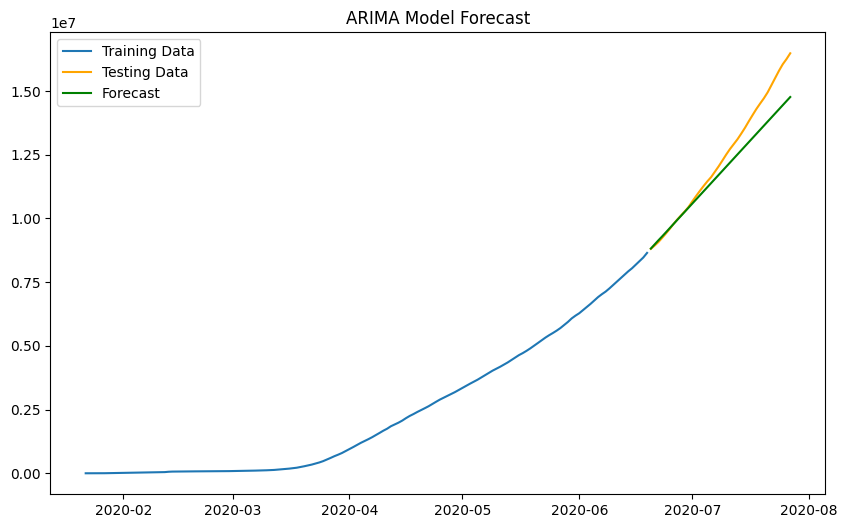

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fit an ARIMA model (p=5, d=1, q=0 as an example)
model = ARIMA(train_data, order=(5, 1, 0))
arima_result = model.fit()

# Forecast
forecast = arima_result.forecast(steps=len(test_data))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Testing Data', color='orange')
plt.plot(test_data.index, forecast, label='Forecast', color='green')
plt.legend()
plt.title('ARIMA Model Forecast')
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate metrics
mae = mean_absolute_error(test_data, forecast)
rmse = np.sqrt(mean_squared_error(test_data, forecast))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 554033.5820189924
Root Mean Squared Error (RMSE): 773526.0993855227


**LSTM (Long Short-Term Memory).**

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler.fit_transform(confirmed_cases)

# Convert to a supervised learning problem
def create_sequences(data, time_steps=7):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps, 0])  # Use past `time_steps` days as features
        y.append(data[i + time_steps, 0])   # Target is the next day's value
    return np.array(X), np.array(y)

# Create sequences with 7 time steps
time_steps = 7
X, y = create_sequences(normalized_data, time_steps)

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape X for LSTM [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (144, 7, 1), y_train shape: (144,)
X_test shape: (37, 7, 1), y_test shape: (37,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(time_steps, 1)),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - loss: 0.0473 - val_loss: 0.5659
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0487 - val_loss: 0.4977
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0337 - val_loss: 0.4319
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0314 - val_loss: 0.3646
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0242 - val_loss: 0.2955
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0165 - val_loss: 0.2261
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0140 - val_loss: 0.1572
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0109 - val_loss: 0.1012
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0103 - val_loss: 0.0603
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0072 - val_loss: 0.0380
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0052 - val_loss: 0.0186
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0029 - val_loss: 0.0043
Epoch 13/20

**LSTM MODEL EVALUATION**

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 336ms/step


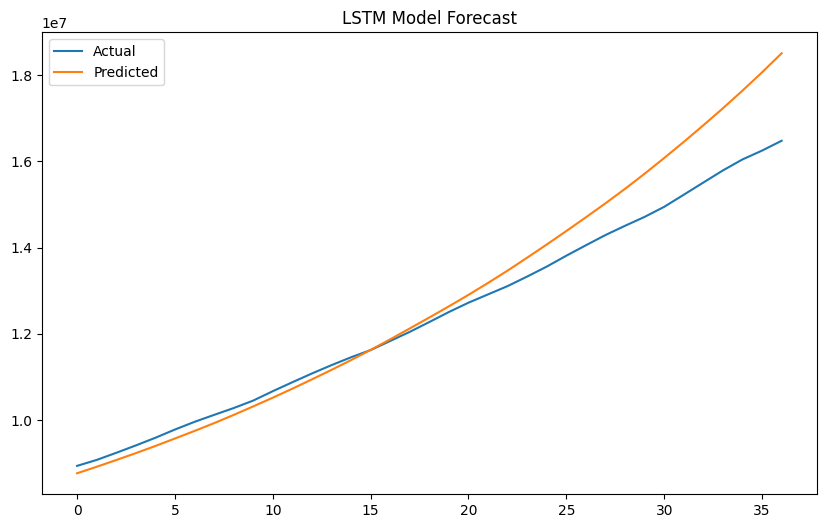

Mean Absolute Error (MAE): 510705.5675675676
Root Mean Squared Error (RMSE): 749155.2840764924


In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Reverse the normalization for true and predicted values
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_actual = scaler.inverse_transform(y_pred)

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual')
plt.plot(y_pred_actual, label='Predicted')
plt.legend()
plt.title('LSTM Model Forecast')
plt.show()

# Evaluate using metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


**CLASSIFICATION MODELING**

In [ ]:
# Sort the dataset by Date to ensure chronological order
df = day_wise.sort_values(by='Date')

# Create the target variable (1 = Increase in cases, 0 = No increase or decrease)
df['CaseTrend'] = (df['Confirmed'].diff() > 0).astype(int)

# Fill NaN values in the first row (since there's no previous day to compare) with 0
df['CaseTrend'].fillna(0, inplace=True)

# Reset the index if 'Date' was previously set as index
df = df.reset_index()  # This line is added

# Preview the new column with Date, Confirmed, and CaseTrend
print(df[['Date', 'Confirmed', 'CaseTrend']].head())

        Date  Confirmed  CaseTrend
0 2020-01-22        555          0
1 2020-01-23        654          1
2 2020-01-24        941          1
3 2020-01-25       1434          1
4 2020-01-26       2118          1


<ipython-input-15-ed723091a143>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CaseTrend'].fillna(0, inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split

# Features: Drop non-predictive columns (e.g., Date) and use the relevant columns for training
X = df.drop(columns=['Date', 'CaseTrend'])  # Remove Date and target column
y = df['CaseTrend']  # The target variable

# Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preview the split
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")


Training set size: 150
Test set size: 38


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        38

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Confusion Matrix:
[[38]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


**MODEL EVALUATION**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the model using the test data
y_pred = model.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Detailed Classification Report (Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        38

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38


Confusion Matrix:
[[38]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


**Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the model and hyperparameters to test
model = LogisticRegression(random_state=42)

param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Solvers for optimization
    'max_iter': [100, 200]  # Maximum number of iterations
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to find the best parameters
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'C': 0.1, 'max_iter': 100, 'solver': 'liblinear'}
Best Accuracy: nan


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
12 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1276, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/usr/

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the Logistic Regression model
model = LogisticRegression(random_state=42)

# Specify the hyperparameters we want to tune
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Solvers for optimization
    'max_iter': [100, 200, 300]  # Maximum number of iterations
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best score
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Accuracy Score: {grid_search.best_score_:.4f}")

# You can also get the best estimator (model with best parameters)
best_model = grid_search.best_estimator_


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Hyperparameters: {'C': 0.1, 'max_iter': 100, 'solver': 'liblinear'}
Best Accuracy Score: nan


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
18 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1276, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/usr/

In [ ]:
# Train the model using the best hyperparameters found
final_model = grid_search.best_estimator_

# Retrain on the full training data
final_model.fit(X_train, y_train)


LogisticRegression(C=0.1, random_state=42, solver='liblinear')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions on the test set
y_pred = final_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        38

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Confusion Matrix:
 [[38]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [ ]:
import joblib

# Save the trained model
joblib.dump(final_model, 'case_trend_final_model.pkl')


['case_trend_final_model.pkl']

**EDA (EXPLORATORY DATA ANALYSIS)**

**1. Trend Analysis (Confirmed, Deaths, Recovered over Time)**

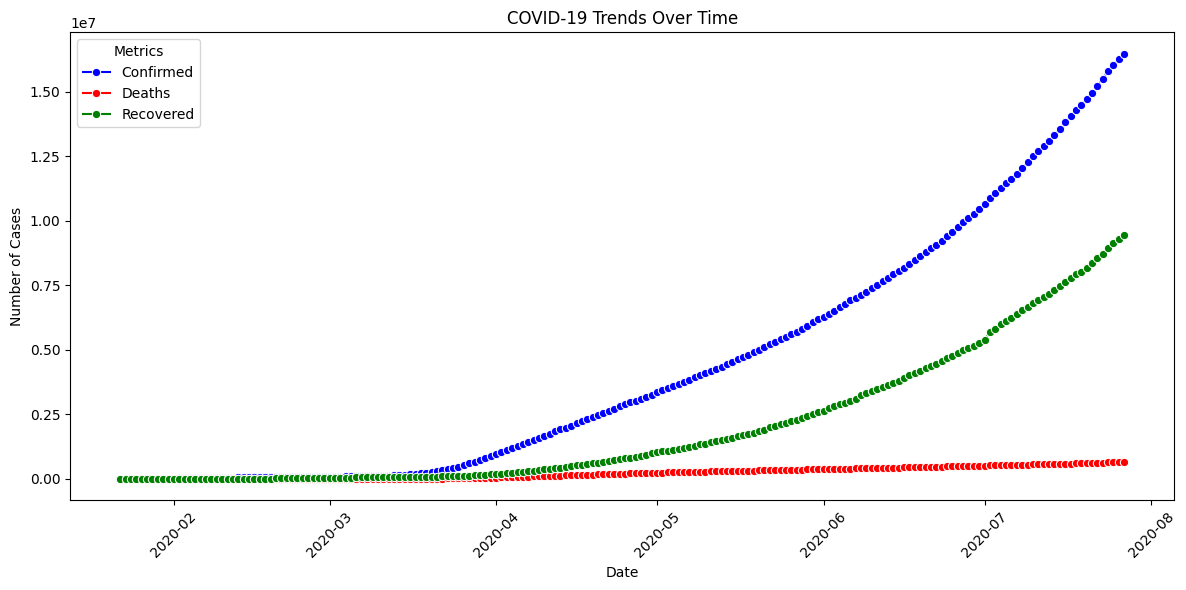

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns # Import Seaborn library

# Trend Analysis for Confirmed, Deaths, and Recovered over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=day_wise, x='Date', y='Confirmed', label='Confirmed', marker='o', color='blue')
sns.lineplot(data=day_wise, x='Date', y='Deaths', label='Deaths', marker='o', color='red')
sns.lineplot(data=day_wise, x='Date', y='Recovered', label='Recovered', marker='o', color='green')

plt.title("COVID-19 Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

**2. Mortality and Recovery Ratios by Country/Region**

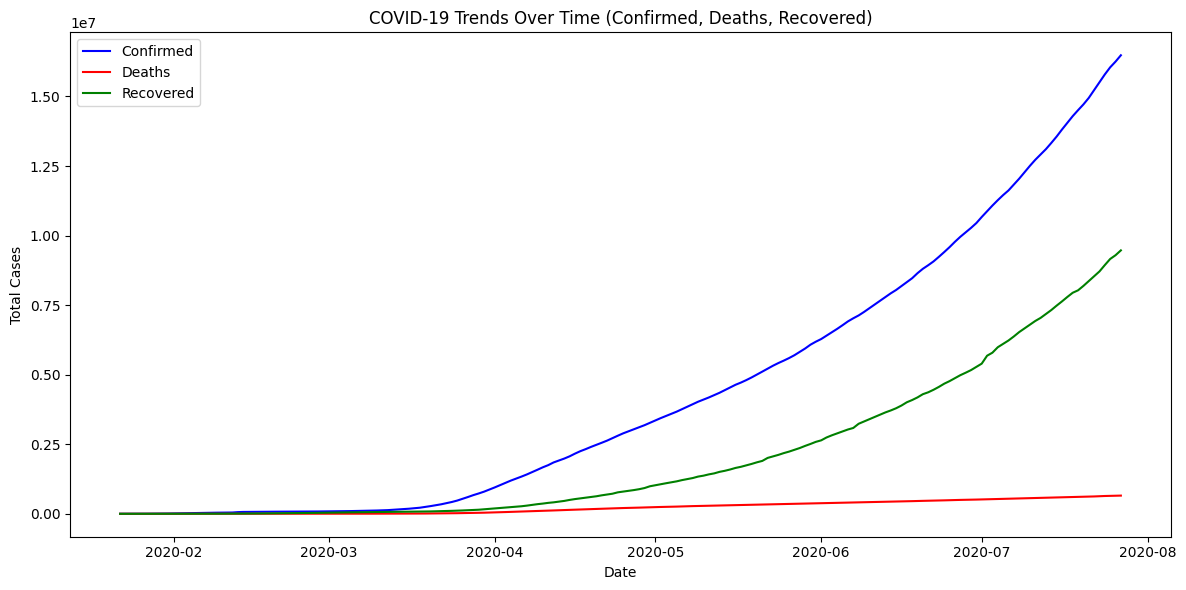

Correlation between Confirmed and Deaths: 0.9760
Correlation between Confirmed and Recovered: 0.9902


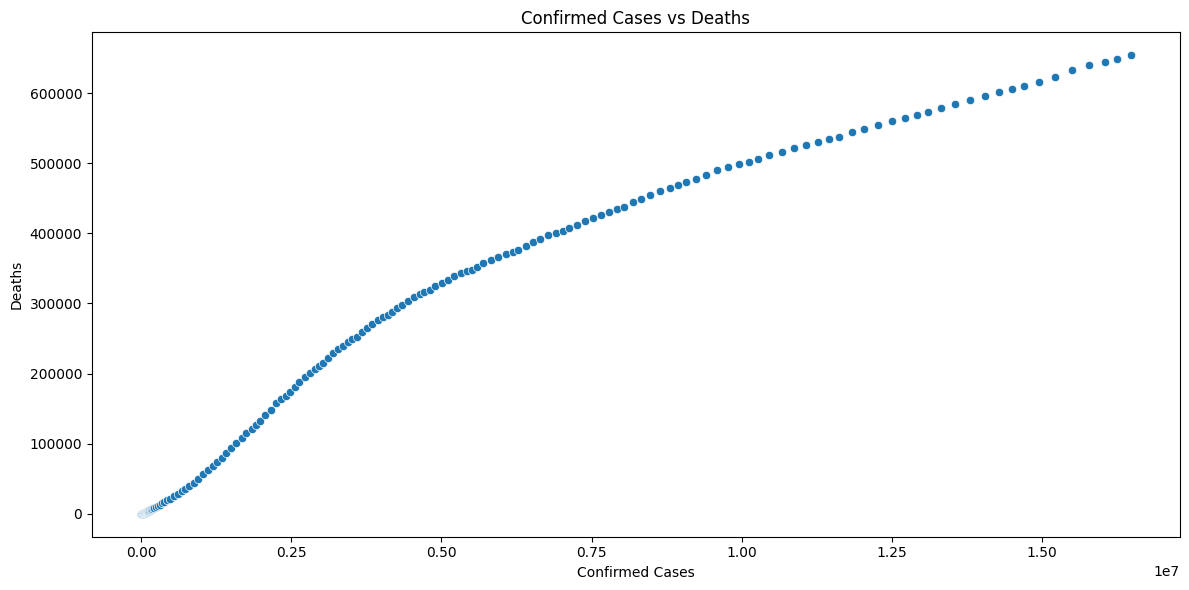

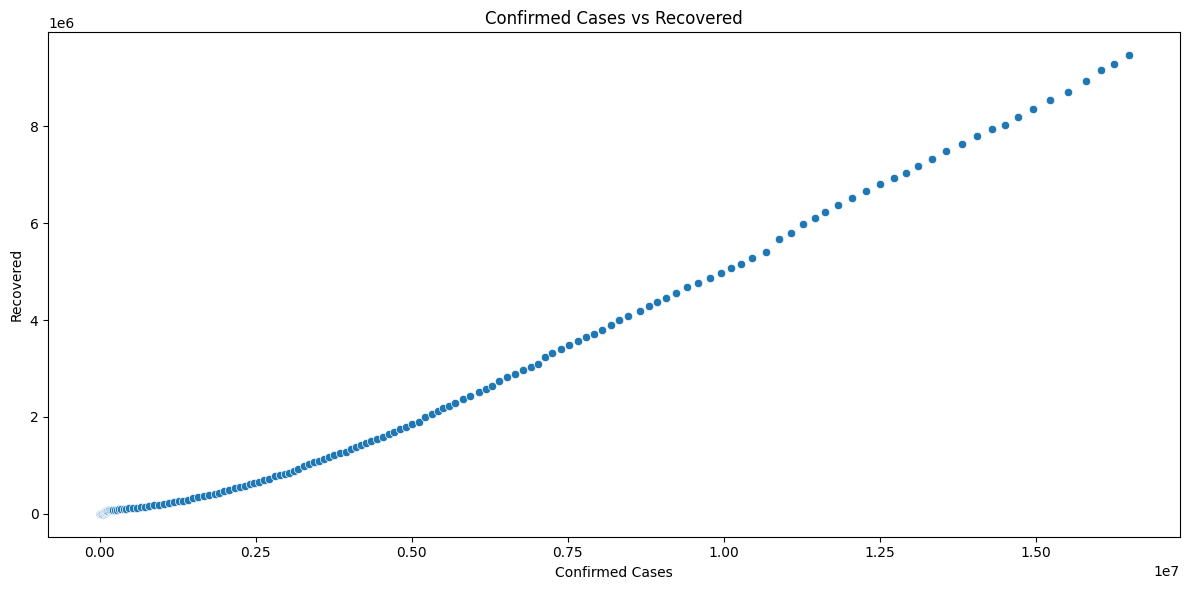

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
covid_data = pd.read_csv('/content/covid_19_clean_complete.csv')

# Drop rows with missing values for key columns to ensure proper analysis
covid_data = covid_data.dropna(subset=['Confirmed', 'Deaths', 'Recovered'])

# Convert 'Date' column to datetime type
covid_data['Date'] = pd.to_datetime(covid_data['Date'])

# Group by Date to aggregate data (sum of Confirmed, Deaths, Recovered for each day)
covid_data_grouped = covid_data.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum()

# 3. EDA - Trends over Time (Confirmed, Deaths, Recovered)

# Plotting trends over time for Confirmed, Deaths, and Recovered cases
plt.figure(figsize=(12, 6))
sns.lineplot(data=covid_data_grouped, x='Date', y='Confirmed', label='Confirmed', color='blue')
sns.lineplot(data=covid_data_grouped, x='Date', y='Deaths', label='Deaths', color='red')
sns.lineplot(data=covid_data_grouped, x='Date', y='Recovered', label='Recovered', color='green')

plt.title('COVID-19 Trends Over Time (Confirmed, Deaths, Recovered)')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.tight_layout()
plt.show()

# 4. Correlation Analysis - Confirmed vs Deaths and Confirmed vs Recovered

# Calculate correlation
correlation_confirmed_deaths = covid_data_grouped['Confirmed'].corr(covid_data_grouped['Deaths'])
correlation_confirmed_recovered = covid_data_grouped['Confirmed'].corr(covid_data_grouped['Recovered'])

# Display the correlation values
print(f"Correlation between Confirmed and Deaths: {correlation_confirmed_deaths:.4f}")
print(f"Correlation between Confirmed and Recovered: {correlation_confirmed_recovered:.4f}")

# Plotting correlation between Confirmed cases and Deaths
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Confirmed', y='Deaths', data=covid_data_grouped)
plt.title('Confirmed Cases vs Deaths')
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.tight_layout()
plt.show()

# Plotting correlation between Confirmed cases and Recovered
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Confirmed', y='Recovered', data=covid_data_grouped)
plt.title('Confirmed Cases vs Recovered')
plt.xlabel('Confirmed Cases')
plt.ylabel('Recovered')
plt.tight_layout()
plt.show()


**3. Correlation Between Key Variables**


Correlation between Confirmed and Deaths: 0.9124
Correlation between Confirmed and Recovered: 0.8955
Correlation between Deaths and Recovered: 0.7631


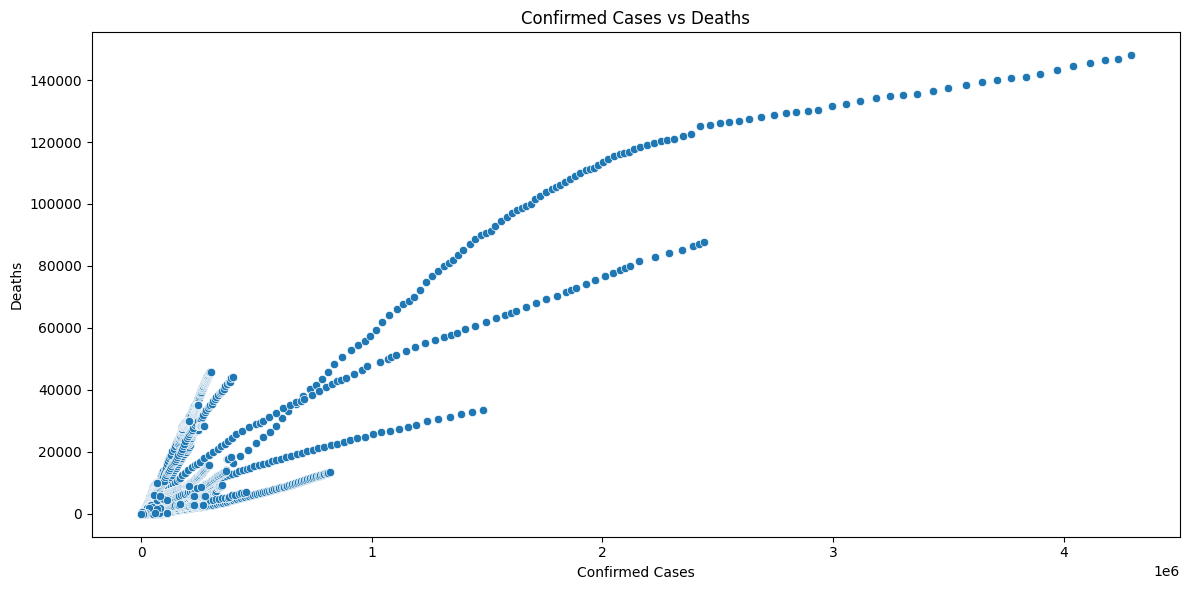

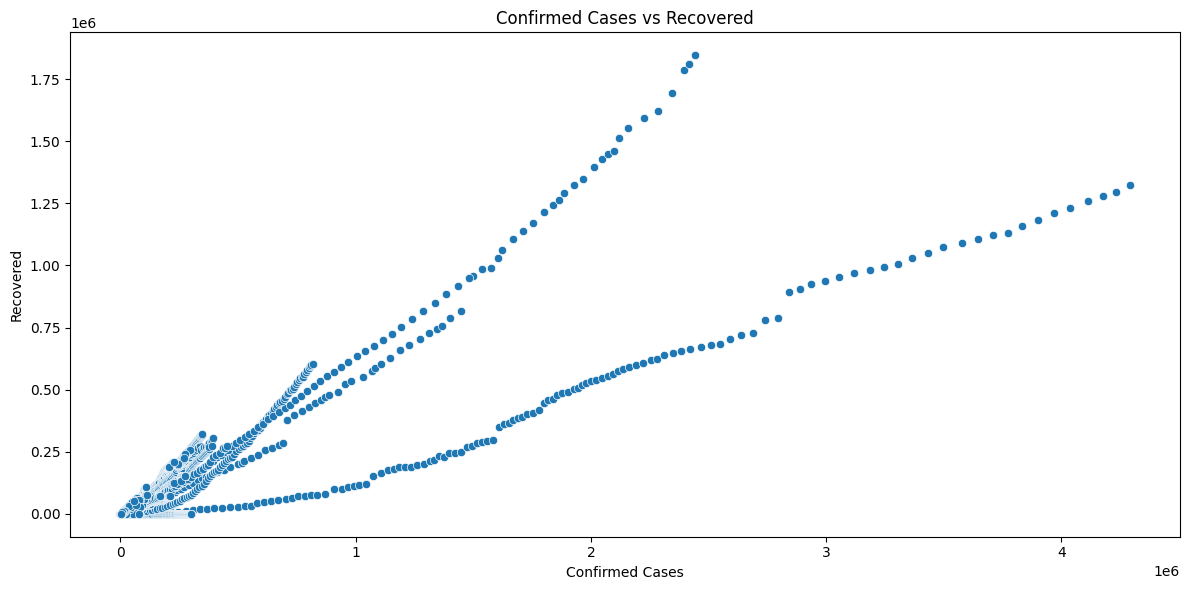

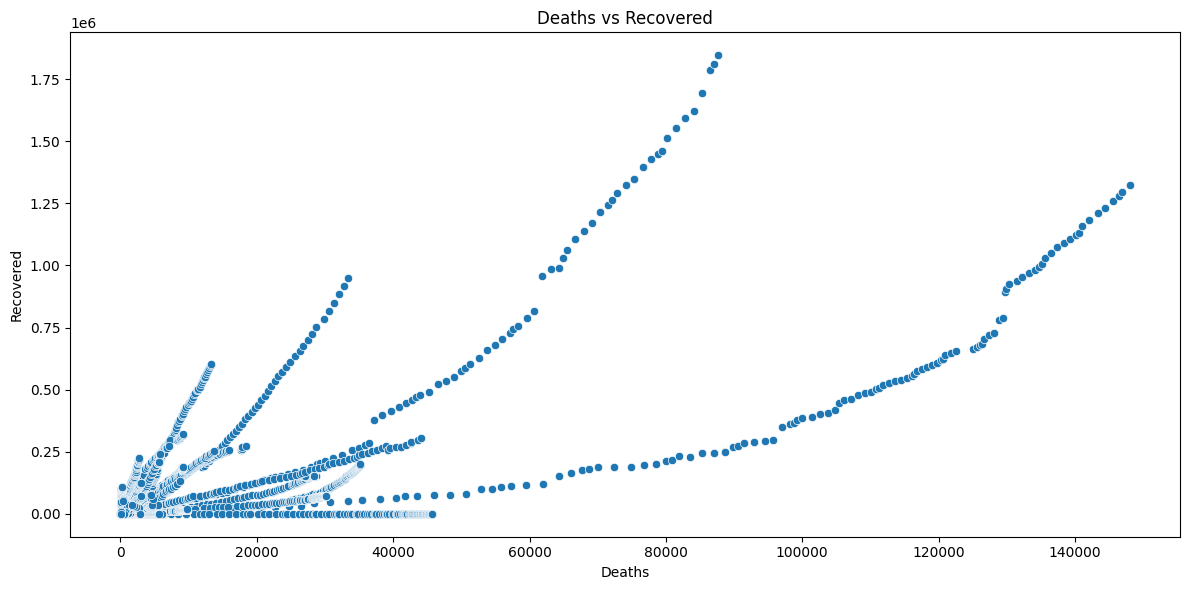

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
covid_data = pd.read_csv('/content/covid_19_clean_complete.csv')

# Check if the 'Population' column exists
if 'Population' not in covid_data.columns:
    print("Warning: 'Population' column not found in the dataset.")
    # If 'Population' column is not found, exclude it from the subset
    covid_data = covid_data.dropna(subset=['Confirmed', 'Deaths', 'Recovered'])
else:
    # If 'Population' column is found, include it in the subset
    covid_data = covid_data.dropna(subset=['Confirmed', 'Deaths', 'Recovered', 'Population'])

# Calculate correlation between Confirmed, Deaths, and Recovered
correlation_confirmed_deaths = covid_data['Confirmed'].corr(covid_data['Deaths'])
correlation_confirmed_recovered = covid_data['Confirmed'].corr(covid_data['Recovered'])
correlation_deaths_recovered = covid_data['Deaths'].corr(covid_data['Recovered'])

# Display the correlation values
print(f"Correlation between Confirmed and Deaths: {correlation_confirmed_deaths:.4f}")
print(f"Correlation between Confirmed and Recovered: {correlation_confirmed_recovered:.4f}")
print(f"Correlation between Deaths and Recovered: {correlation_deaths_recovered:.4f}")

# Plotting the correlations
# Confirmed vs Deaths
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Confirmed', y='Deaths', data=covid_data)
plt.title('Confirmed Cases vs Deaths')
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.tight_layout()
plt.show()

# Confirmed vs Recovered
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Confirmed', y='Recovered', data=covid_data)
plt.title('Confirmed Cases vs Recovered')
plt.xlabel('Confirmed Cases')
plt.ylabel('Recovered')
plt.tight_layout()
plt.show()

# Deaths vs Recovered
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Deaths', y='Recovered', data=covid_data)
plt.title('Deaths vs Recovered')
plt.xlabel('Deaths')
plt.ylabel('Recovered')
plt.tight_layout()
plt.show()


**4. Impact of Population on COVID-19 Cases.**

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (adjust the file path as needed)
covid_data = pd.read_csv('/content/covid_19_clean_complete.csv')

# Check if the 'Population' column exists in the DataFrame
if 'Population' not in covid_data.columns:
    print("Warning: 'Population' column not found in the dataset. Excluding it from the analysis.")
    # If 'Population' column is not found, exclude it from the subset
    covid_data = covid_data.dropna(subset=['Confirmed', 'Deaths', 'Recovered'])
else:
    # If 'Population' column is found, include it in the subset
    covid_data = covid_data.dropna(subset=['Confirmed', 'Deaths', 'Recovered', 'Population'])

# Calculate the cases per million population for Confirmed, Deaths, and Recovered
# Only if 'Population' column exists
if 'Population' in covid_data.columns:
    covid_data['Confirmed_Per_Million'] = (covid_data['Confirmed'] / covid_data['Population']) * 1e6
    covid_data['Deaths_Per_Million'] = (covid_data['Deaths'] / covid_data['Population']) * 1e6
    covid_data['Recovered_Per_Million'] = (covid_data['Recovered'] / covid_data['Population']) * 1e6

    # Plotting the impact of population on COVID-19 cases
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='Population', y='Confirmed_Per_Million', data=covid_data)
    plt.title('Confirmed Cases Per Million vs Population')
    plt.xlabel('Population')
    plt.ylabel('Confirmed Cases Per Million')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='Population', y='Deaths_Per_Million', data=covid_data)
    plt.title('Deaths Per Million vs Population')
    plt.xlabel('Population')
    plt.ylabel('Deaths Per Million')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='Population', y='Recovered_Per_Million', data=covid_data)
    plt.title('Recovered Cases Per Million vs Population')
    plt.xlabel('Population')
    plt.ylabel('Recovered Cases Per Million')
    plt.tight_layout()
    plt.show()
else:
    print("Warning: Skipping population-based analysis as 'Population' column is not available.")

**MODELS REFINING**

**Time series model (ARIMA)**

<ipython-input-67-d469e3ff0c19>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Confirmed'] = data['Confirmed'].fillna(0)  # Fill missing values
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, fre

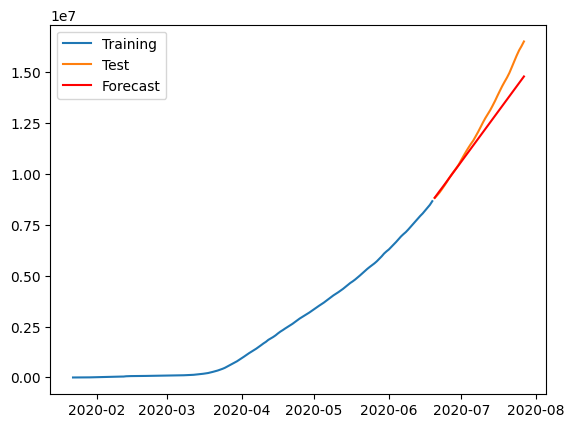

In [67]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np

# Re-import and process data (use your processed and scaled data)
# Assuming 'Date' is a column, not the index
if 'Date' in day_wise.columns:  # Check if 'Date' column exists
    data = day_wise[['Date', 'Confirmed']].set_index('Date')
else:
    # If 'Date' is already the index, just select 'Confirmed'
    data = day_wise[['Confirmed']]

data['Confirmed'] = data['Confirmed'].fillna(0)  # Fill missing values

# Split into training and test datasets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Fit ARIMA model (example with order (p=5, d=1, q=0))
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# Forecasting
forecast = model_fit.forecast(steps=len(test))

# Plot results
plt.plot(train.index, train['Confirmed'], label='Training')
plt.plot(test.index, test['Confirmed'], label='Test')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.legend()
plt.show()

**Classification model**

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestClassifier()

# Define the parameter grid to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model with the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Get the best model
best_rf = grid_search.best_estimator_

# Evaluate the best model on test data
y_pred = best_rf.predict(X_test)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


**Evaluating Model Performance**

**Time Series Model Evaluation; RMSE (Root Mean Squared Error)**

In [69]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Confirmed'], forecast))
print(f"RMSE: {rmse}")


RMSE: 773526.0993855227


**Classification Model Evaluation;**
**Accuracy, Precision, Recall, F1-score, and AUC**


In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)  # If applicable
recall = recall_score(y_test, y_pred)        # If applicable
f1 = f1_score(y_test, y_pred)                # If applicable

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


**MODEL FINE-TUNING**

**Fine-Tuning the Time Series Model**

In [73]:
from statsmodels.tsa.arima.model import ARIMA
import itertools

# Define the range for p, d, q
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

# Store the best parameters and their AIC
best_aic = float("inf")
best_order = None

# Loop through all combinations of p, d, q
for order in pdq:
    try:
        model = ARIMA(train['Confirmed'], order=order)
        model_fit = model.fit()
        aic = model_fit.aic  # Akaike Information Criterion

        # If current AIC is better, save the parameters
        if aic < best_aic:
            best_aic = aic
            best_order = order
    except:
        continue

print(f"Best Parameters: {best_order} with AIC: {best_aic}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

Best Parameters: (0, 2, 2) with AIC: 3099.7300907436684


In [74]:
best_model = ARIMA(train['Confirmed'], order=best_order)
best_model_fit = best_model.fit()

# Forecast
forecast = best_model_fit.forecast(steps=len(test))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


**Fine-Tuning the Classification Model**

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestClassifier()

# Define the parameter grid to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model with the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Get the best model
best_rf = grid_search.best_estimator_

# Evaluate the best model on test data
y_pred = best_rf.predict(X_test)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        38

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
258 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

In [76]:
# Using Random Forest's feature importance to select top features
importances = best_rf.feature_importances_

# Get the indices of top features
indices = np.argsort(importances)[::-1]
top_features = X_train.columns[indices[:10]]  # Select top 10 features

# Train the model again using only the top features
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Re-train and evaluate
best_rf.fit(X_train_top, y_train)
y_pred = best_rf.predict(X_test_top)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        38

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



**Cross-Validation**

In [77]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Random Forest
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy: 0.9933 ± 0.0133


**MODEL EVALUATION**

**Classification Model Evaluation**

In [89]:
print("y_test values:", y_test[:10])
print("y_pred values:", y_pred[:10])
print("y_test type:", type(y_test))
print("y_pred type:", type(y_pred))


y_test values: 183    1
162    1
18     1
15     1
67     1
108    1
45     1
76     1
16     1
146    1
Name: CaseTrend, dtype: int64
y_pred values: 150    8.821838e+06
151    8.986095e+06
152    9.149769e+06
153    9.313408e+06
154    9.477045e+06
155    9.640681e+06
156    9.804317e+06
157    9.967953e+06
158    1.013159e+07
159    1.029522e+07
Name: predicted_mean, dtype: float64
y_test type: <class 'pandas.core.series.Series'>
y_pred type: <class 'pandas.core.series.Series'>


In [90]:
# Assuming probabilities are between 0 and 1
y_pred = (y_pred > 0.5).astype(int)

In [92]:
# Assuming probabilities are between 0 and 1
y_pred = (y_pred > 0.5).astype(int)

**Time series Model Evaluation**

In [85]:
# Assuming your data is in a DataFrame called 'df'
# Ensure your data is sorted by date
df = df.sort_values('Date')

# Define the size of the training set (80% train, 20% test)
train_size = int(len(df) * 0.8)

# Split into training and testing sets
df_train = df.iloc[:train_size]  # First 80% for training
df_test = df.iloc[train_size:]  # Last 20% for testing


In [86]:
from statsmodels.tsa.arima.model import ARIMA

# Use the 'Confirmed' column for modeling
y_train = df_train['Confirmed']

# Fit the ARIMA model
model = ARIMA(y_train, order=(2, 1, 2))  # Replace (2, 1, 2) with the best order for your data
model_fit = model.fit()

# Forecast on the test data
y_pred = model_fit.forecast(steps=len(df_test))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [87]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Get the actual values from the test set
y_true = df_test['Confirmed']

# Calculate evaluation metrics
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = mse ** 0.5

# Print the evaluation results
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 504320270378.1291
Mean Absolute Error (MAE): 502164.038056134
Root Mean Squared Error (RMSE): 710155.1030430811


In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

Confusion Matrix:
 [[38]]

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        38

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [94]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_test = le.fit_transform(y_test)


**MODEL VISUALIZATION**

**Visualizations of Time-Series Model Predictions**

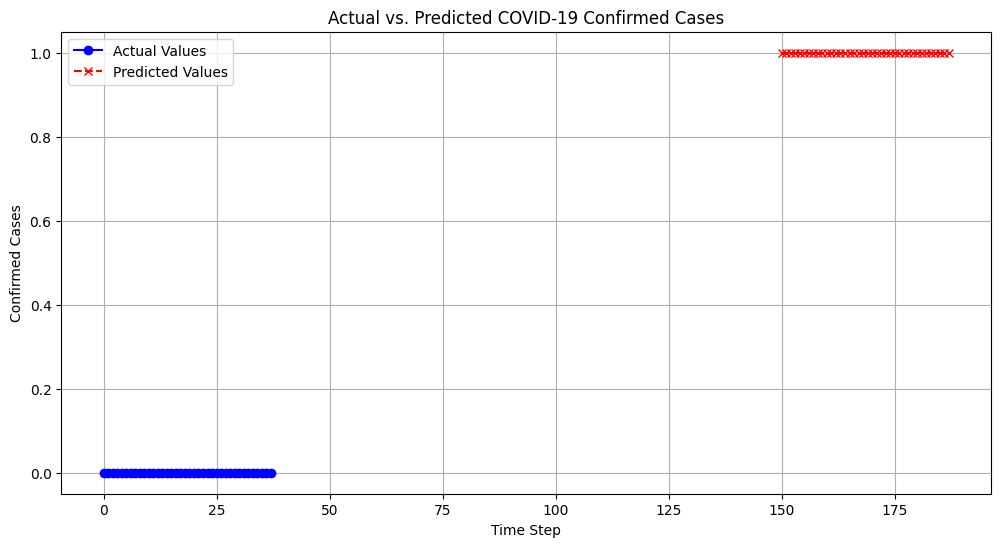

In [96]:
# Plot Actual vs. Predicted Cases
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', marker='o', color='blue')  # No need to reset the index for NumPy array
plt.plot(y_pred, label='Predicted Values', marker='x', color='red', linestyle='--')
plt.title('Actual vs. Predicted COVID-19 Confirmed Cases')
plt.xlabel('Time Step')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.grid(True)
plt.show()


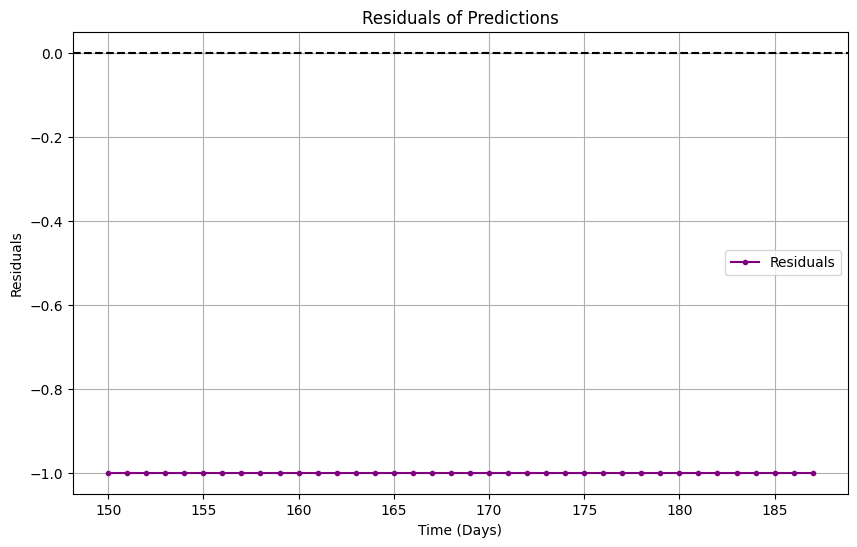

In [98]:
# Calculate Residuals
residuals = y_test - y_pred # y_test is already a NumPy array, no need to reset index

# Plot Residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals', color='purple', marker='.')
plt.axhline(0, color='black', linestyle='--')
plt.title('Residuals of Predictions')
plt.xlabel('Time (Days)')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()

**Visualizations of Classification Model Predictions**

<Figure size 800x600 with 0 Axes>

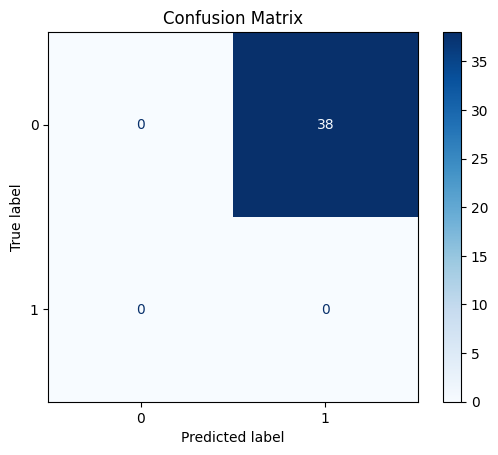

In [99]:
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', colorbar=True)
plt.title('Confusion Matrix')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


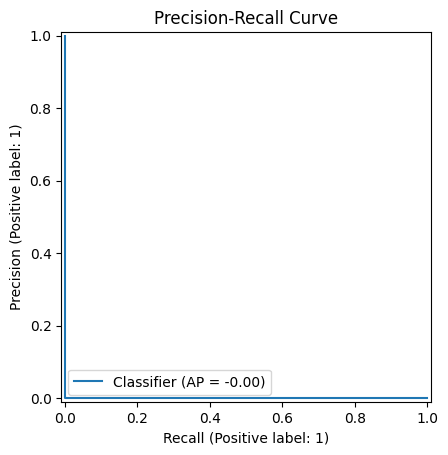

In [100]:
from sklearn.metrics import PrecisionRecallDisplay

# Precision-Recall Curve
PrecisionRecallDisplay.from_predictions(y_test, y_pred)
plt.title('Precision-Recall Curve')
plt.show()


**EDA Visualization**

<ipython-input-103-214cbf6ecb03>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=covid_19_clean_complete, x='Date', y='Confirmed', ci=None, color='blue')


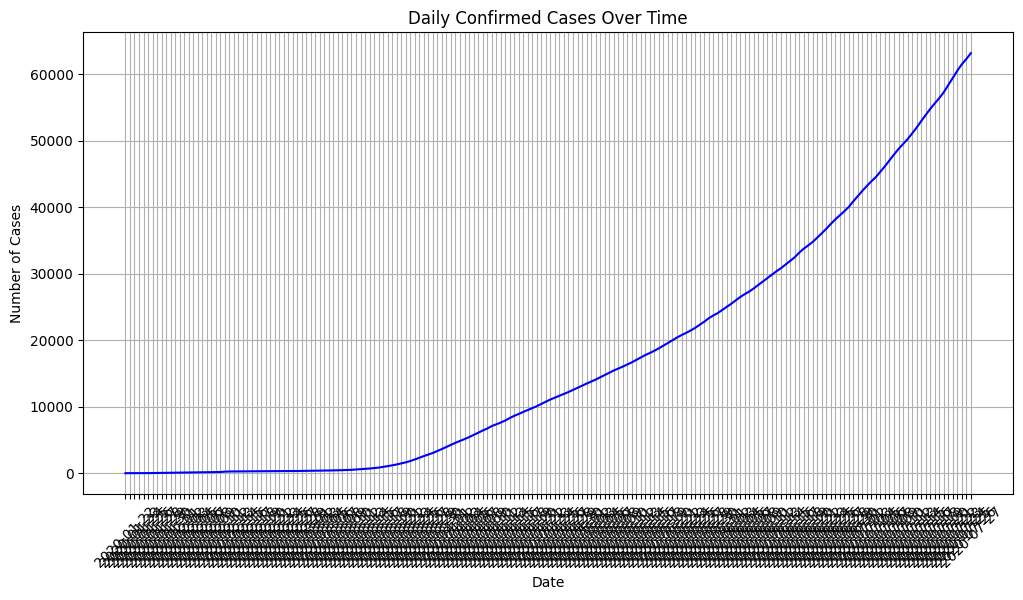

In [103]:
import seaborn as sns
import pandas as pd

# Import pandas for data manipulation
covid_19_clean_complete = pd.read_csv('covid_19_clean_complete.csv')

# Line Plot of Daily Confirmed Cases
plt.figure(figsize=(12, 6))
sns.lineplot(data=covid_19_clean_complete, x='Date', y='Confirmed', ci=None, color='blue')
plt.title('Daily Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

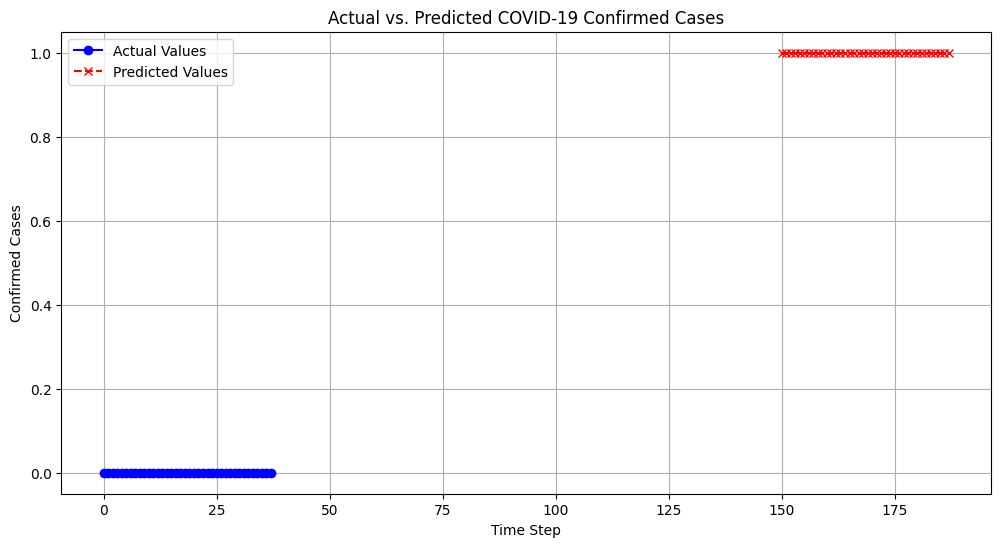

In [108]:
# Plot Actual vs. Predicted Cases
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', marker='o', color='blue')  # No need to reset the index for NumPy array
plt.plot(y_pred, label='Predicted Values', marker='x', color='red', linestyle='--')
plt.title('Actual vs. Predicted COVID-19 Confirmed Cases')
plt.xlabel('Time Step')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.grid(True)
plt.show()


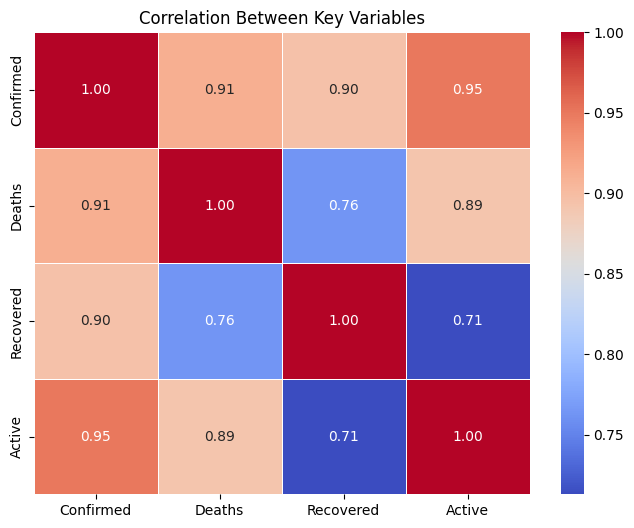

In [109]:
# Calculate Correlation Matrix
correlation_matrix = covid_19_clean_complete[['Confirmed', 'Deaths', 'Recovered', 'Active']].corr()

# Plot Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Key Variables')
plt.show()


**Overall Insights and Summary Visualization**, **Top 10 Countries by Confirmed Cases:**

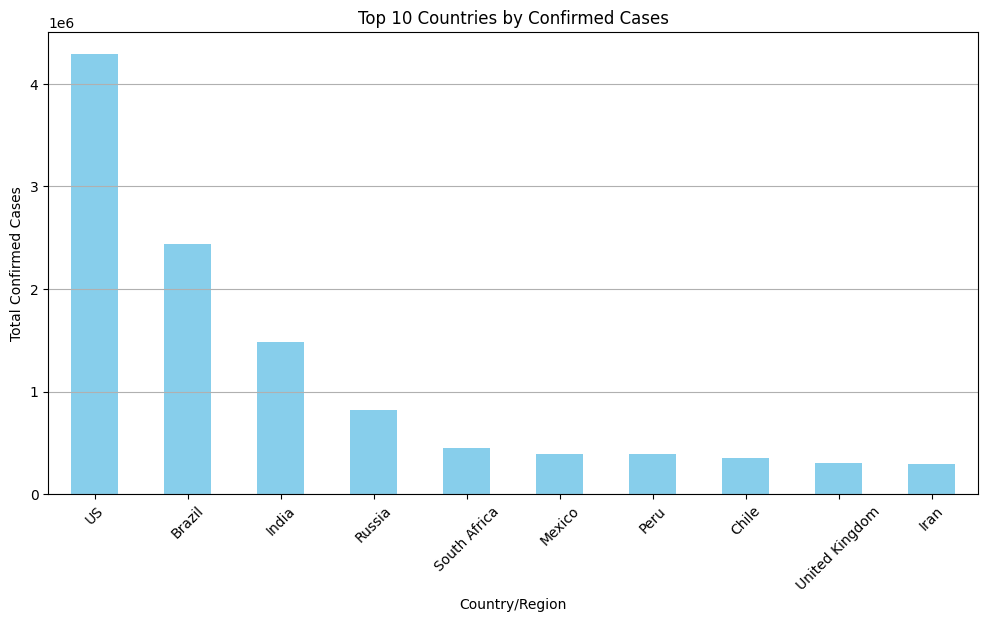

In [110]:
top_10_countries = covid_19_clean_complete.groupby('Country/Region')['Confirmed'].max().nlargest(10)

plt.figure(figsize=(12, 6))
top_10_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Confirmed Cases')
plt.xlabel('Country/Region')
plt.ylabel('Total Confirmed Cases')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


**Cases by WHO Region:**

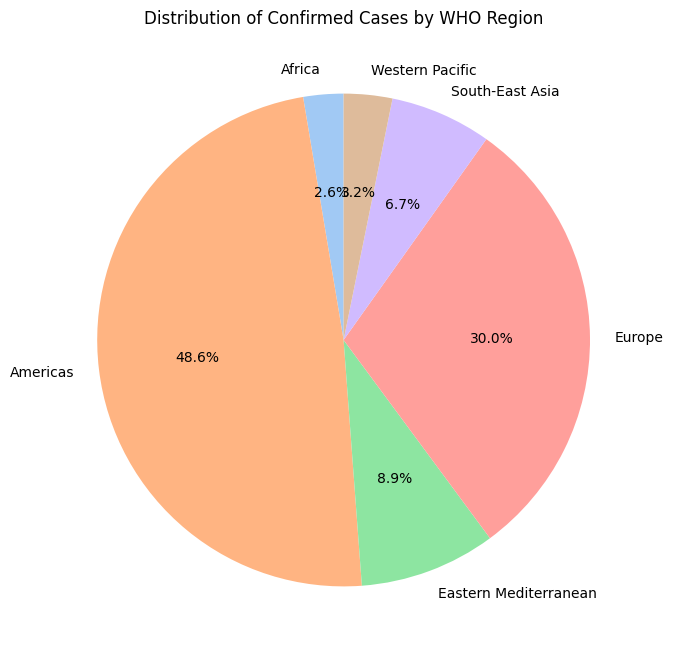

In [111]:
# Group by WHO Region
region_cases = covid_19_clean_complete.groupby('WHO Region')['Confirmed'].sum()

# Pie Chart
plt.figure(figsize=(8, 8))
region_cases.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90)
plt.title('Distribution of Confirmed Cases by WHO Region')
plt.ylabel('')  # Remove default ylabel
plt.show()
